   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

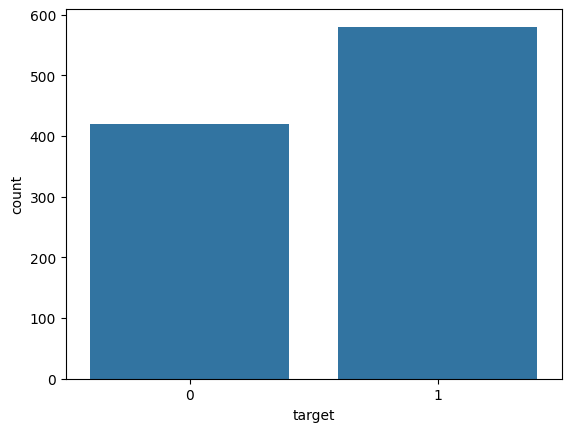

Accuracy: 0.985
Confusion Matrix:
 [[ 81   2]
 [  1 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.98      0.99      0.99       117

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("cardiovascular_Disease_Dataset.csv", encoding='utf-8')

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualize target distribution
sns.countplot(x='target', data=df)
plt.show()  # fixed

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # fixed

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

